## Training image classificatiion model using yolo

In [1]:
!nvidia-smi

Sun Jan  4 12:51:18 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   58C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
!unzip /content/data.zip

Streaming output truncated to the last 5000 lines.
 extracting: train/Melanoma/ISIC_6868834_jpg.rf.dd165e88054116f6b2caae248fc235ef.jpg  
 extracting: train/Melanoma/ISIC_6869019_jpg.rf.916965158b74ffc38c53cb052c0694cd.jpg  
 extracting: train/Melanoma/ISIC_6869019_jpg.rf.bddd44aeca451c2c60af6a5ba10dfb0c.jpg  
 extracting: train/Melanoma/ISIC_6869122_jpg.rf.3d2718689a6955b1bc20dd19ed174ac3.jpg  
 extracting: train/Melanoma/ISIC_6869122_jpg.rf.a8e027bf2fb2e9f913eb91cc62431848.jpg  
 extracting: train/Melanoma/ISIC_6869128_jpg.rf.3fab4b11f061e6fbfdde0ebffce36190.jpg  
 extracting: train/Melanoma/ISIC_6869128_jpg.rf.6056def0aa0f05dd729d8f3b21d0f0d3.jpg  
 extracting: train/Melanoma/ISIC_6870134_jpg.rf.7014c16c65e93651477a052b52d19a59.jpg  
 extracting: train/Melanoma/ISIC_6870134_jpg.rf.dec544dc573cff4e66f65a3ddf2f6fc9.jpg  
 extracting: train/Melanoma/ISIC_6870647_jpg.rf.1a0792bb5db51549955239b091ff4e2c.jpg  
 extracting: train/Melanoma/ISIC_6870647_jpg.rf.42f4cde216043467dcfe163a93cc8c8

In [3]:
!pip install ultralytics==8.2.103 -q

!yolo settings sync=False
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.2/112.6 GB disk)


In [6]:
from ultralytics import YOLO
!yolo task=classify mode=train model=yolov8n-cls.pt data=/content/data.zip epochs=25  imgsz=128

100% 5.31M/5.31M [00:00<00:00, 165MB/s]
New https://pypi.org/project/ultralytics/8.3.247 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/data.zip, epochs=25, time=None, patience=100, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_mask

## Sample Prediction

In [9]:
!yolo task=classify mode=predict model=/content/runs/classify/train2/weights/best.pt conf=0. source=/content/test/Basal_Cell_Carcinoma

Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,437,442 parameters, 0 gradients, 3.3 GFLOPs

image 1/358 /content/test/Basal_Cell_Carcinoma/ISIC_0024360_jpg.rf.1966900a69862517b5a8e3475149d7d3.jpg: 128x128 Basal Cell Carcinoma 1.00, Melanoma 0.00, 2.5ms
image 2/358 /content/test/Basal_Cell_Carcinoma/ISIC_0024931_jpg.rf.b5825bb65c5dcb3a3d93761df5ff82db.jpg: 128x128 Basal Cell Carcinoma 0.94, Melanoma 0.06, 3.0ms
image 3/358 /content/test/Basal_Cell_Carcinoma/ISIC_0025031_jpg.rf.762a1687dd819355474660f35ee182f3.jpg: 128x128 Basal Cell Carcinoma 1.00, Melanoma 0.00, 2.2ms
image 4/358 /content/test/Basal_Cell_Carcinoma/ISIC_0025691_jpg.rf.00626b4c99e0807d97a341e3227c1609.jpg: 128x128 Basal Cell Carcinoma 0.73, Melanoma 0.27, 2.1ms
image 5/358 /content/test/Basal_Cell_Carcinoma/ISIC_0025700_jpg.rf.c7e8bb64f936993a814193a017af61a9.jpg: 128x128 Basal Cell Carcinoma 1.00, Melanoma 0.00, 2.1ms
image 6/358 /content

In [10]:
!yolo task=classify mode=predict model=/content/runs/classify/train2/weights/best.pt conf=0. source=/content/test/Melanoma

Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,437,442 parameters, 0 gradients, 3.3 GFLOPs

image 1/362 /content/test/Melanoma/ISIC_0065969_JPG.rf.eea7d8ec959835a0c65cf3c914ce932f.jpg: 128x128 Melanoma 0.95, Basal Cell Carcinoma 0.05, 2.2ms
image 2/362 /content/test/Melanoma/ISIC_0066204_JPG.rf.430d0c3ac92424185d30d8b955fe154e.jpg: 128x128 Basal Cell Carcinoma 1.00, Melanoma 0.00, 2.5ms
image 3/362 /content/test/Melanoma/ISIC_0066354_JPG.rf.c464ee3209104dab317dac4d4f10fca5.jpg: 128x128 Melanoma 1.00, Basal Cell Carcinoma 0.00, 2.2ms
image 4/362 /content/test/Melanoma/ISIC_0066382_JPG.rf.c8cb23da5428ecf9929715cf2e83f860.jpg: 128x128 Melanoma 1.00, Basal Cell Carcinoma 0.00, 2.2ms
image 5/362 /content/test/Melanoma/ISIC_0066408_JPG.rf.8694b584188bb97f05e539e91174ec68.jpg: 128x128 Melanoma 1.00, Basal Cell Carcinoma 0.00, 2.2ms
image 6/362 /content/test/Melanoma/ISIC_0066750_JPG.rf.3441c337323c9a94f4a3454c8

In [11]:
import glob

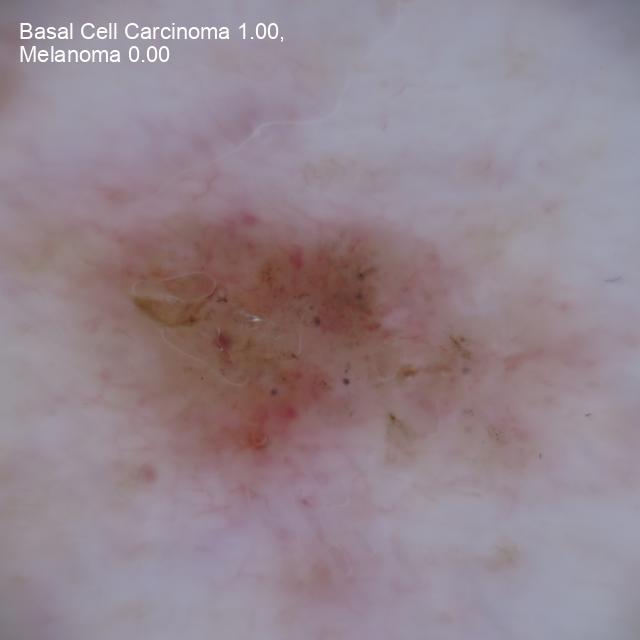

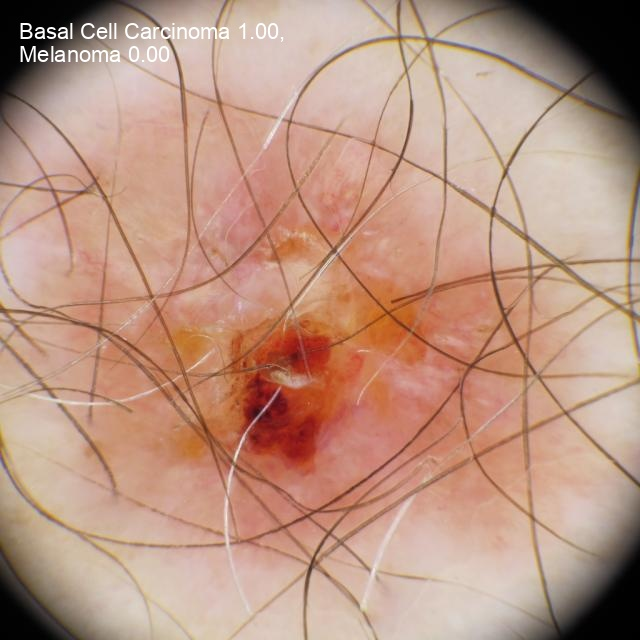

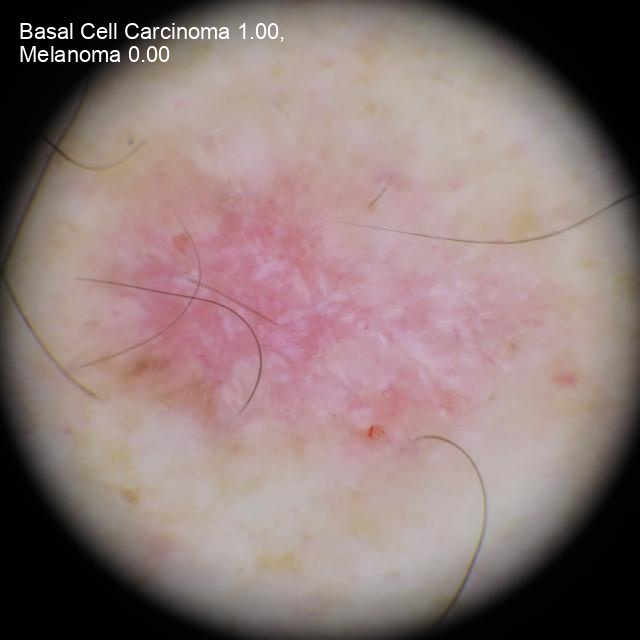

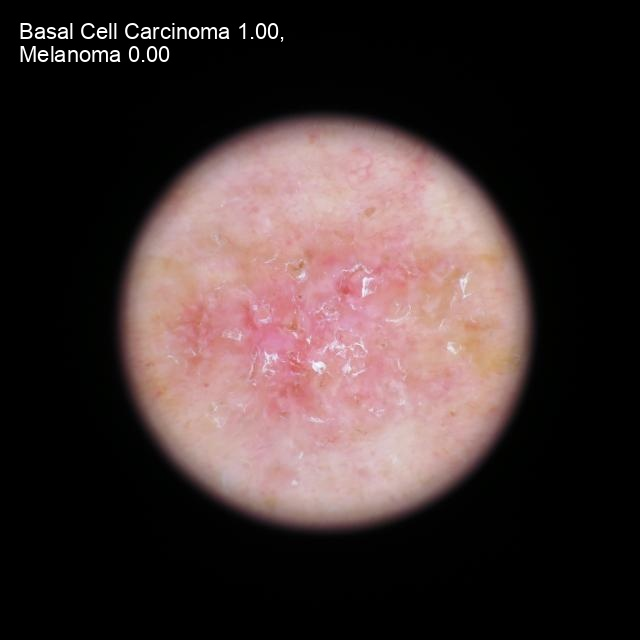

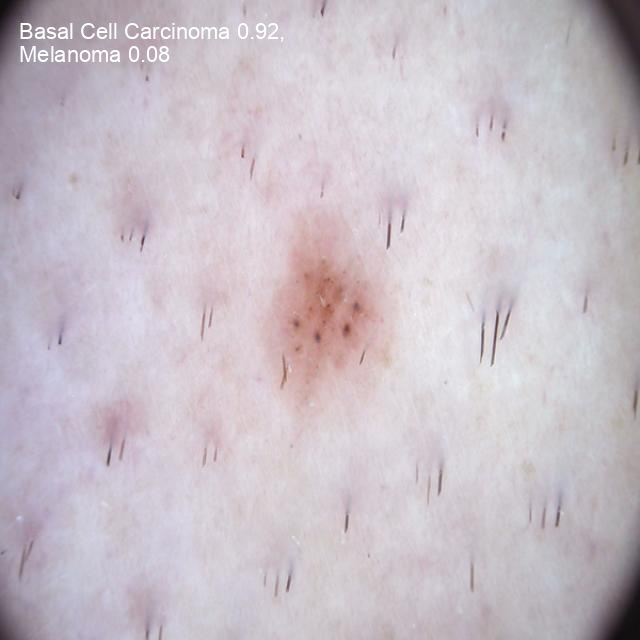

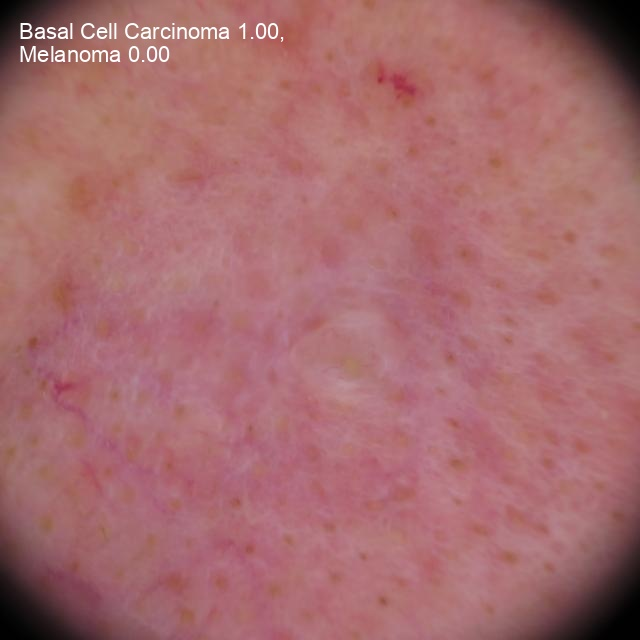

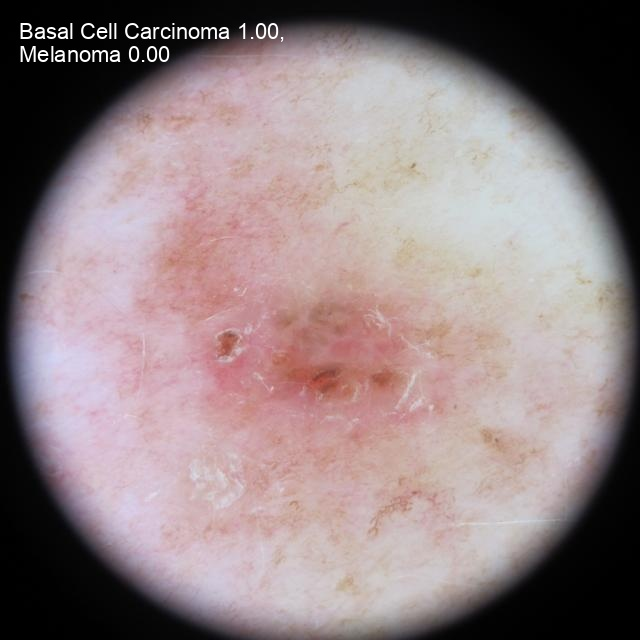

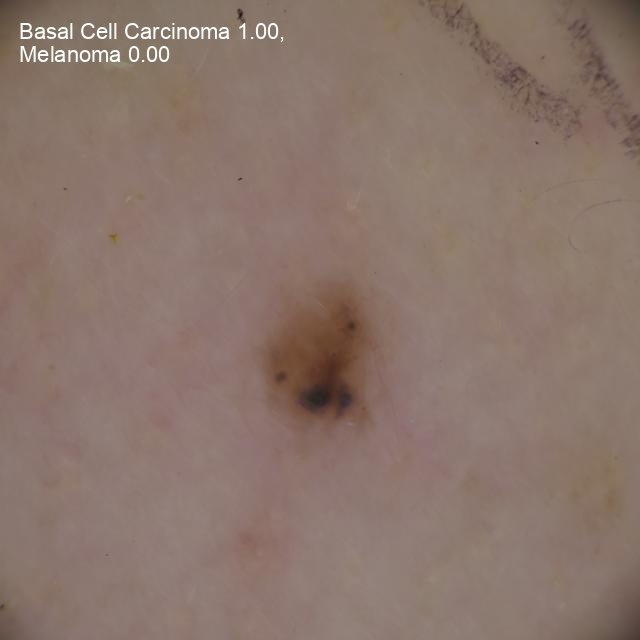

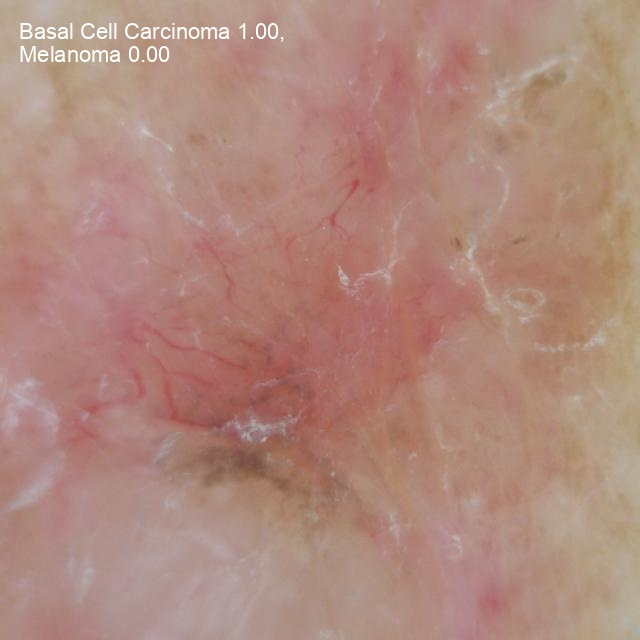

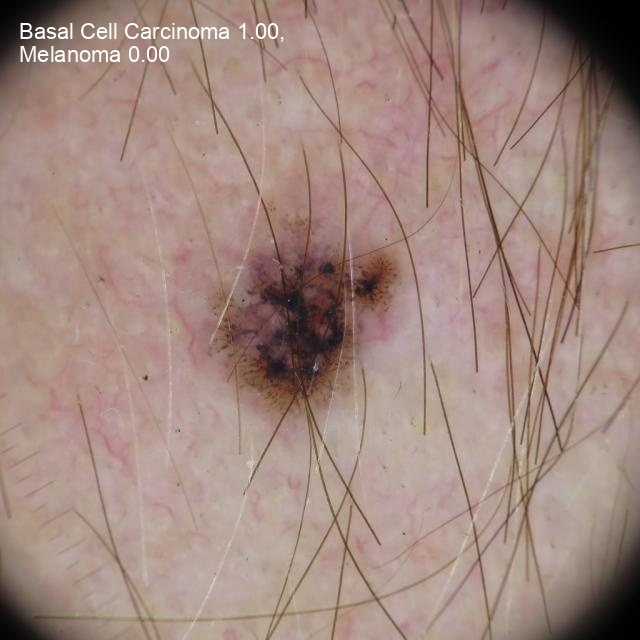

In [12]:
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/classify/predict/*.jpg')[:10]:
  display(Image(filename=image_path, width=600))
  print("\n")

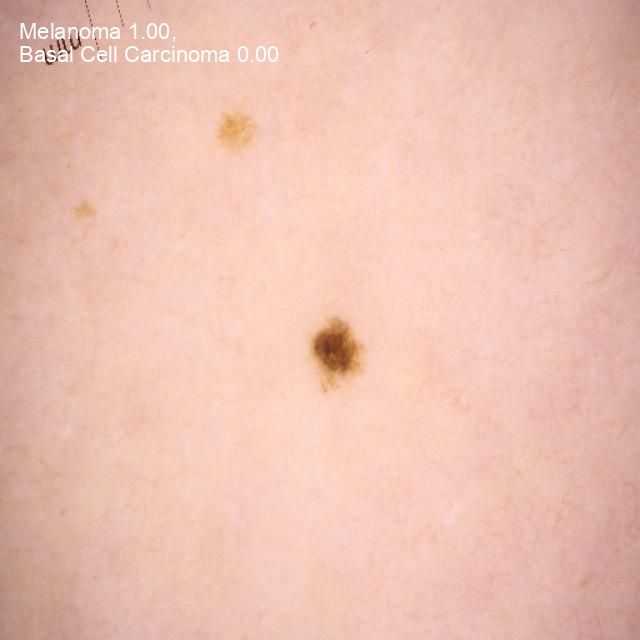

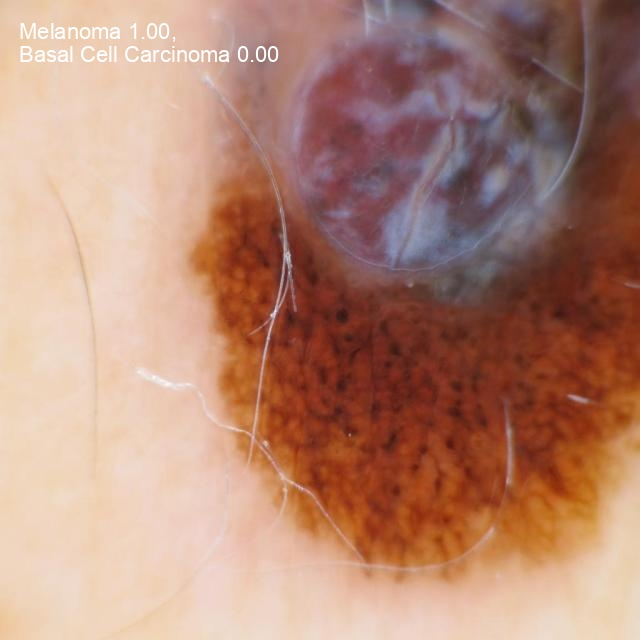

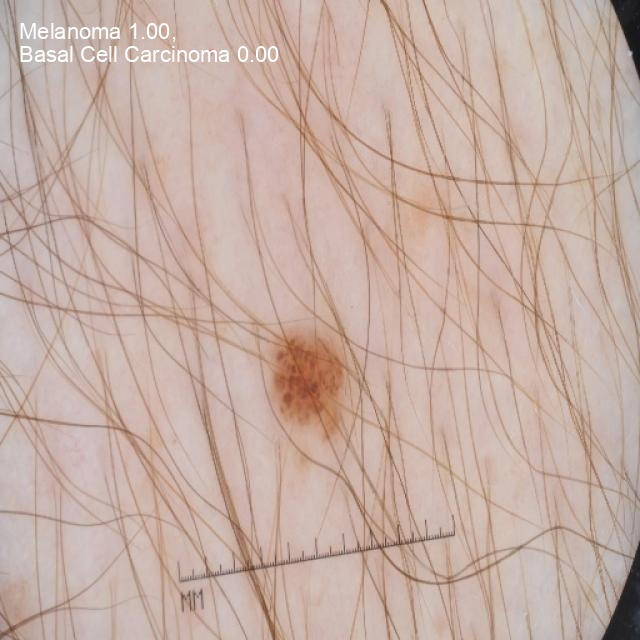

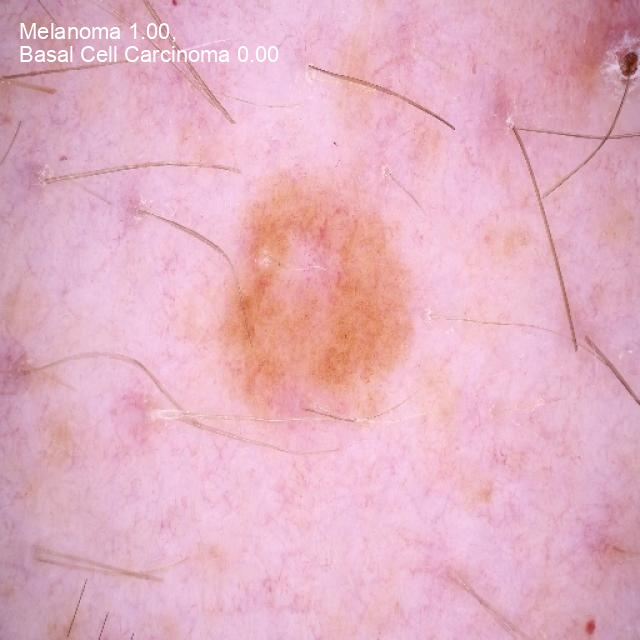

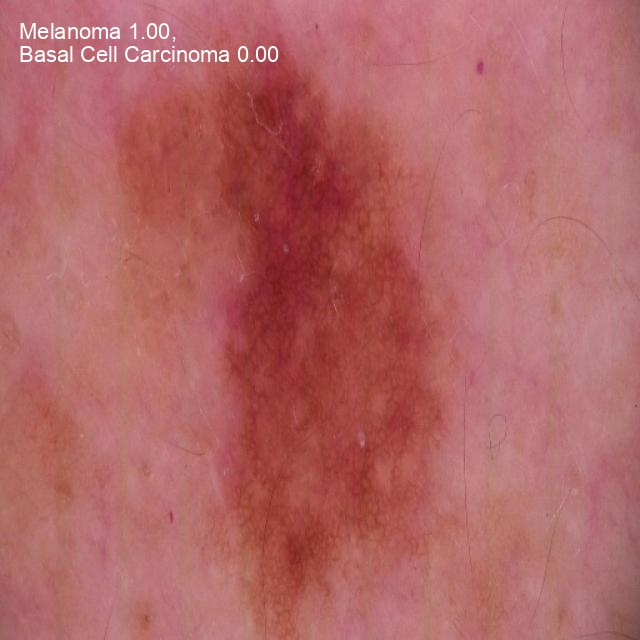

In [13]:
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/classify/predict2/*.jpg')[:5]:
  display(Image(filename=image_path, width=600))
  print("\n")